# EDS296 HW1: Plotting Time Series with CMIP6 Data
### Author & Date: 
Madison Enda  04/21/2025

### Import packages

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs

### Pull data from Amazon Web Services

In [21]:
# First model: CanESM5

# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

# Specify search terms to query catalog for CanESM5 data
# activity_id: CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: Model CanESM5
source_id = ['CanESM5']

# experiment_id: Historical and the four main SSPs
experiment_ids = ['historical', 'ssp126']

# member_id: Ensemble member r10i1p1f1
member_id = 'r10i1p1f1'

# table_id: Monthly atmosphere data
table_id = 'Amon' 

# variable_id: surface air temperature (tas)
variable_id = 'tas'

In [25]:
# Second model: MIROC6

# Open the CMIP6 data catalog, store as a variable
catalog_2 = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

# Specify search terms to query catalog for MIRCO6 data
# activity_id: CMIP = historical data, ScenarioMIP = future projections
activity_ids_2 = ['ScenarioMIP', 'CMIP'] 

# source_id: Model MIROC6
source_id_2 = ['MIROC6']

# experiment_id: Historical and the four main SSPs
experiment_ids_2 = ['historical', 'ssp126']

# member_id: Ensemble member r10i1p1f1
member_id_2 = 'r10i1p1f1'

# table_id: Monthly atmosphere data
table_id_2 = 'Amon' 

# variable_id: surface air temperature (tas)
variable_id_2 = 'tas'

### Query catalog and find historical data and future projection for CanESM5 model

In [23]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res.df)

# Read in the historical data file
hist_data = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})

# Read in the SSP370 data file
ssp126_data = xr.open_zarr(res.df['zstore'][1], storage_options={'anon': True})

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,ScenarioMIP,CCCma,CanESM5,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


In [54]:
# Concatenate historical and future projection data
canesm5_data = xr.concat([hist_data, ssp126_data], dim="time")

### Query catalog and find historical data and future projection for MIROC6 model

In [26]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids_2, source_id=source_id_2, experiment_id=experiment_ids_2, 
                     member_id=member_id_2, table_id=table_id_2, variable_id=variable_id_2)

# Display data frame associated with results
display(res.df)

# Read in the historical data file
hist_data_2 = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})

# Read in the SSP370 data file
ssp126_data_2 = xr.open_zarr(res.df['zstore'][1], storage_options={'anon': True})

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,MIROC,MIROC6,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/MIROC/MIROC6/histori...,NaN,20181212
1,ScenarioMIP,MIROC,MIROC6,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/MIROC/MIROC6/...,NaN,20200817


In [55]:
# Concatenate historical and future projection data
miroc6_data = xr.concat([hist_data_2, ssp126_data_2], dim="time")

### Location: New York City, New York

- This region is an example of a highly urban area, with little vegetation. Large amounts of impervious surface area result in increased heat and decreased absorption of moisture, meaning the effects of increased air temperature would be difficult to mitigate. I used to live on Long Island, very close to NYC, and the city felt incredibly hot and muggy in the summer (even worse than LA to me, oddly enough). Many climate models show major changes predicted for NY, and this lead me to chose it as my location for this project.

### Plot the time series data for Model 1: CanESM5

In [43]:
# For historic data
# Define min/max bounds for region of interest (NYC)
lat_min, lat_max = 40, 41.5
lon_min, lon_max = 285.5, 287

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_NYC_lat = (hist_data.lat >= lat_min) & (hist_data.lat <= lat_max)
tas_NYC_lon = (hist_data.lon >= lon_min) & (hist_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_NYC = hist_data.where(tas_NYC_lat & tas_NYC_lon, drop=True)

# Average over lat, lon dimensions to get a time series
tas_NYC = tas_NYC.mean(dim=["lat", "lon"])

# Convert time to datetime64 format
time = hist_data.time.astype('datetime64[ns]')

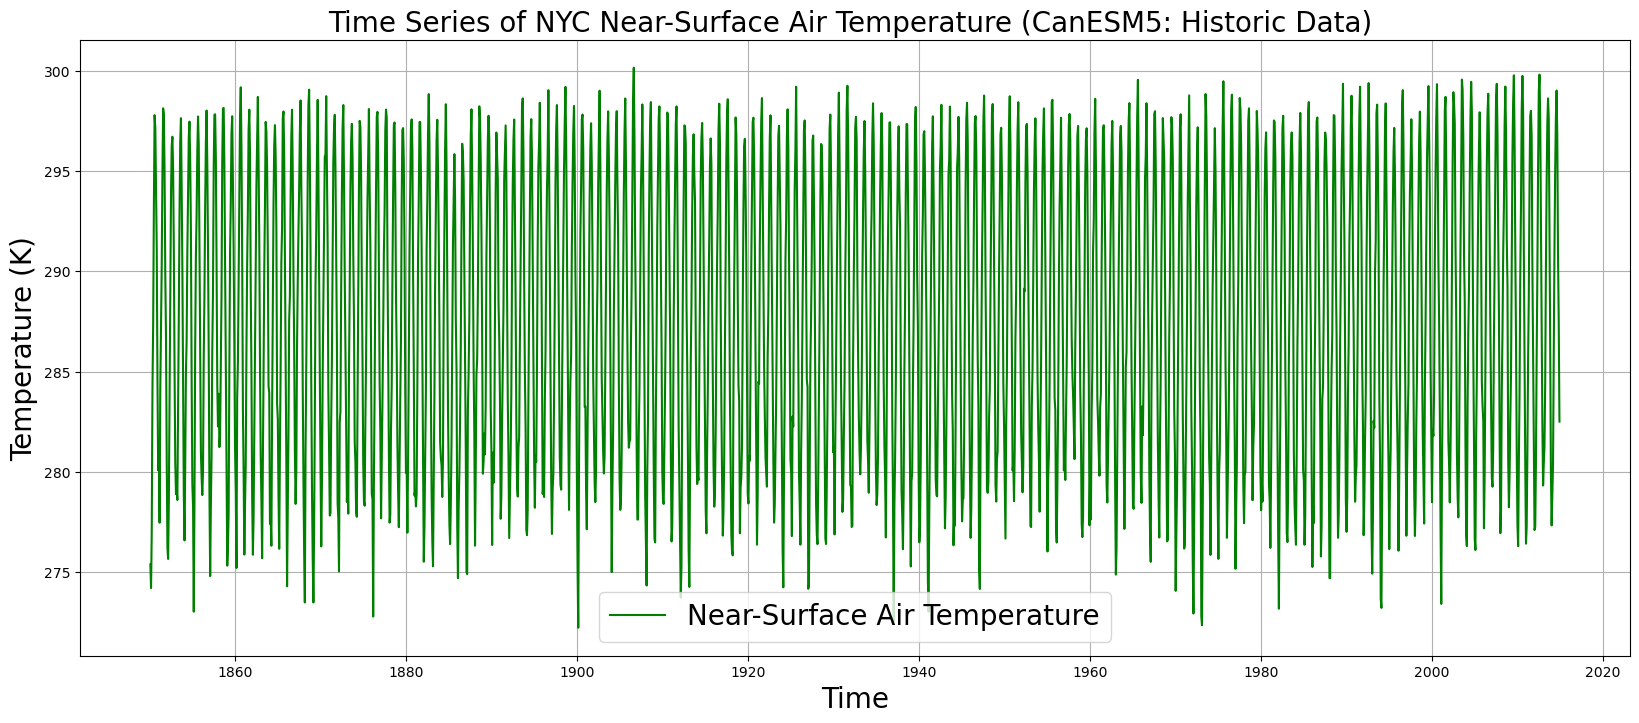

In [46]:
# Generate plot for Historic Data
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_NYC.tas, label='Near-Surface Air Temperature', color='g')
ax.set_title("Time Series of NYC Near-Surface Air Temperature (CanESM5: Historic Data) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

In [56]:
# For ssp126 projection
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_NYC_lat = (canesm5_data.lat >= lat_min) & (canesm5_data.lat <= lat_max)
tas_NYC_lon = (canesm5_data.lon >= lon_min) & (canesm5_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_NYC = canesm5_data.where(tas_NYC_lat & tas_NYC_lon, drop=True)

# Average over lat, lon dimensions to get a time series
tas_NYC = tas_NYC.mean(dim=["lat", "lon"])

# Convert time to datetime64 format
time = canesm5_data.time.astype('datetime64[ns]')

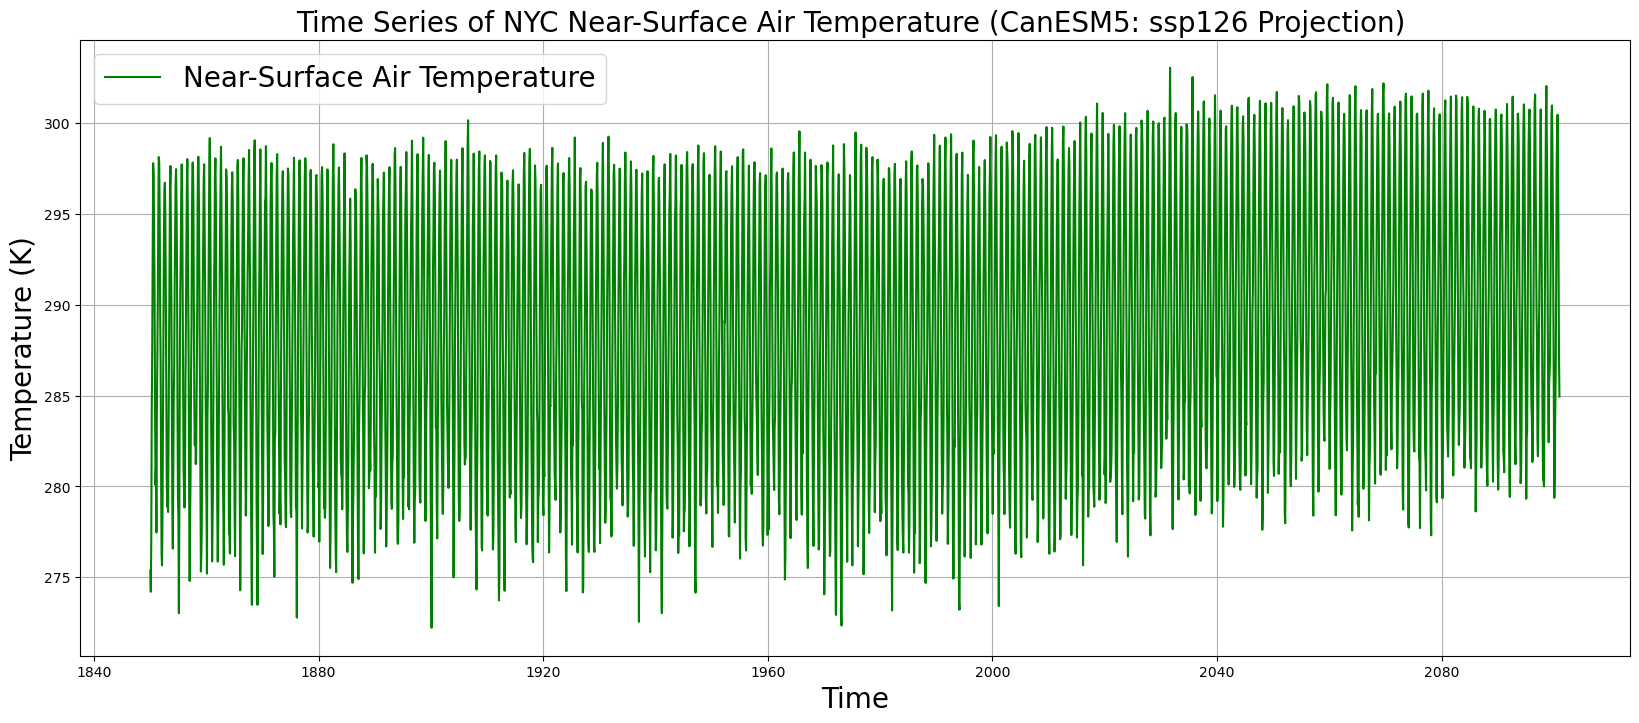

In [57]:
# Generate plot for ssp126 projection Data
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_NYC.tas, label='Near-Surface Air Temperature', color='g')
ax.set_title("Time Series of NYC Near-Surface Air Temperature (CanESM5: ssp126 Projection) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

- The historic data for this model shows an ever so slight increase in near-surface air temperature (tas), whereas the historic and projection data combined shows a dramatic increase (that I would consider to be a statistically significant increase) through the year 2085. 
- Higher temperatures would result in a great many changes to the NYC environment: issues like increased toxic algal blooms in the East and Hudson rivers, increased risk of fires, increased instances of heatstroke and exposure related illnesses, etc. A change this significant would devestate the local ecosystems NYC relies on, and without adequate access to such resources (being in a highly urban area), people living here would either need to pay inordinate amounts of money to pull them from other places(which would spark major controversy), or suffer massively.

### Plot the time series data for Model 2: MIROC6

In [49]:
# For historic data
# Define min/max bounds for region of interest (NYC)
lat_min, lat_max = 40, 41.5
lon_min, lon_max = 285.5, 287

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_NYC_lat = (hist_data_2.lat >= lat_min) & (hist_data_2.lat <= lat_max)
tas_NYC_lon = (hist_data_2.lon >= lon_min) & (hist_data_2.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_NYC = hist_data_2.where(tas_NYC_lat & tas_NYC_lon, drop=True)

# Average over lat, lon dimensions to get a time series
tas_NYC = tas_NYC.mean(dim=["lat", "lon"])

# Convert time to datetime64 format
time = hist_data_2.time.astype('datetime64[ns]')

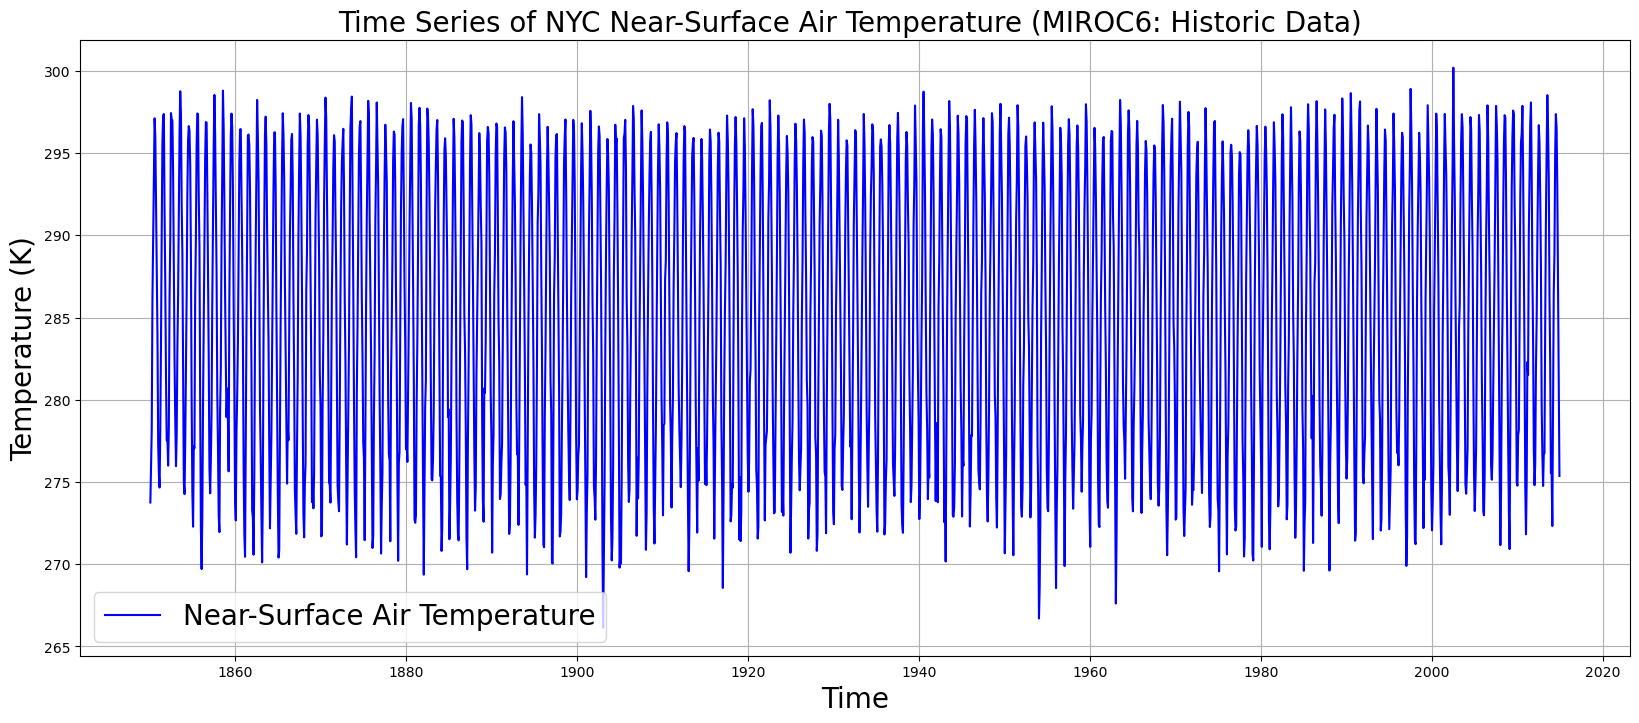

In [50]:
# Generate plot for Historic Data
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_NYC.tas, label='Near-Surface Air Temperature', color='b')
ax.set_title("Time Series of NYC Near-Surface Air Temperature (MIROC6: Historic Data) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

In [58]:
# For ssp126 projection
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_NYC_lat = (miroc6_data.lat >= lat_min) & (miroc6_data.lat <= lat_max)
tas_NYC_lon = (miroc6_data.lon >= lon_min) & (miroc6_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_NYC = miroc6_data.where(tas_NYC_lat & tas_NYC_lon, drop=True)

# Average over lat, lon dimensions to get a time series
tas_NYC = tas_NYC.mean(dim=["lat", "lon"])

# Convert time to datetime64 format
time = miroc6_data.time.astype('datetime64[ns]') 

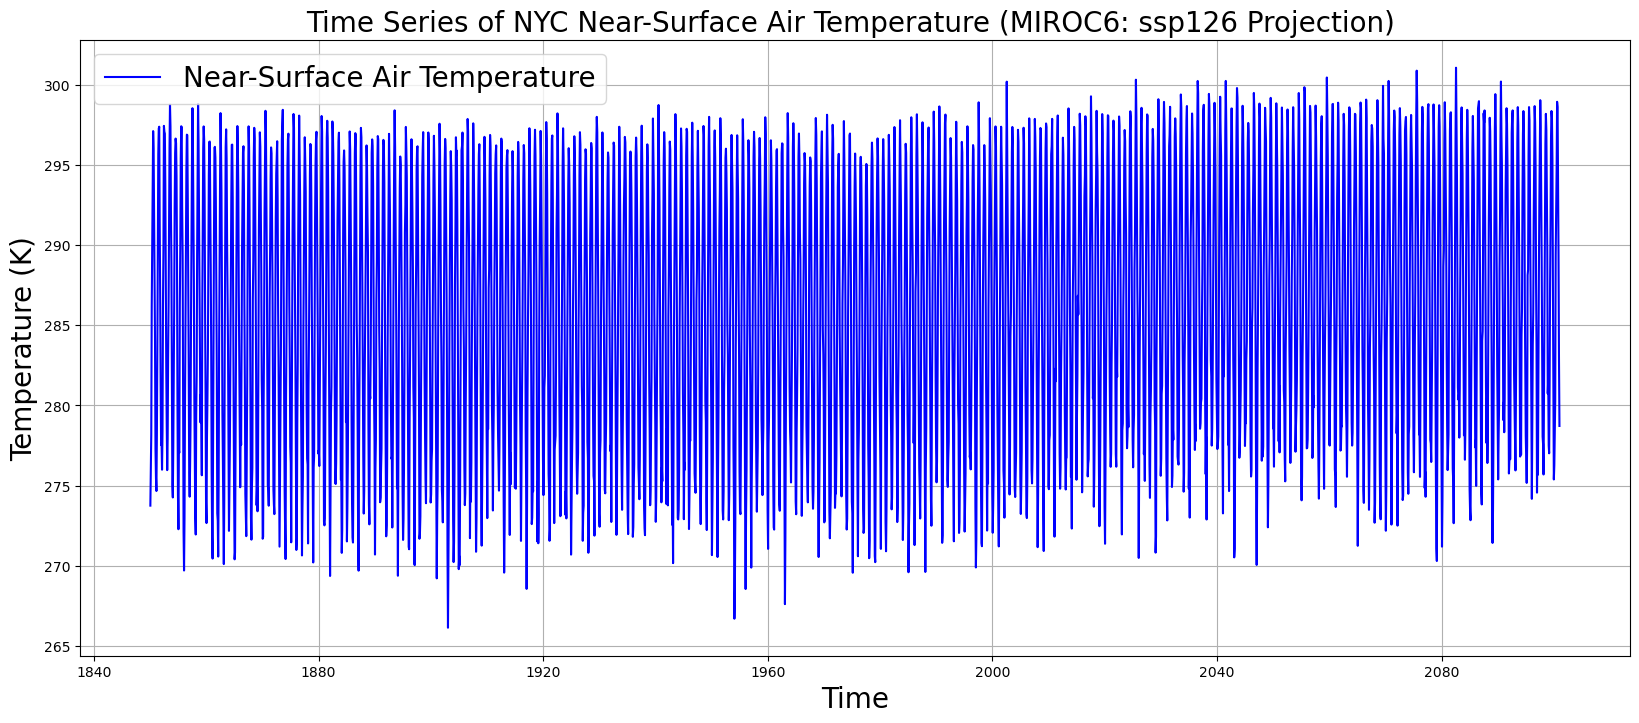

In [59]:
# Generate plot for ssp126 projection Data
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_NYC.tas, label='Near-Surface Air Temperature', color='b')
ax.set_title("Time Series of NYC Near-Surface Air Temperature (MIROC6: ssp126 Projection) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

- While both the historic and combined projection data for the MIROC6 model show increases in tas over time, they are much less severe than projected in the first model. Looking at the changes in the combined historic/projection plot, I would still consider these changes to be statistically significant. 
- These changes would likely still result in the same issues mentioned regarding the CanESM5 historic and projection data above, but relief efforts would be slightly less expensive, and would likely result in fewer casualties, injuries, and ecosystem disasters.